In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# تحميل البيانات
X = np.load('dataset/x.npy').astype('float32') # صور
y = np.load('dataset/y.npy').astype('float32')          # one-hot encoded labels
X = np.expand_dims(X, axis=-1)

indices = np.arange(len(X))
np.random.shuffle(indices)

X = X[indices]
y = y[indices]



In [34]:
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (2062, 64, 64, 1), y shape: (2062, 10)


![digits](img.jpg)

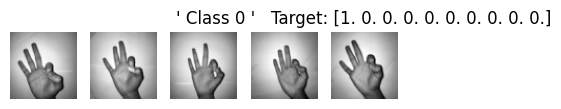

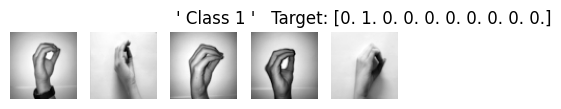

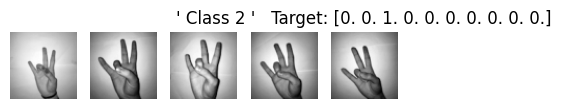

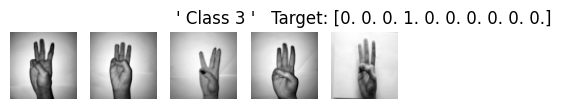

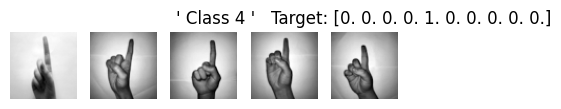

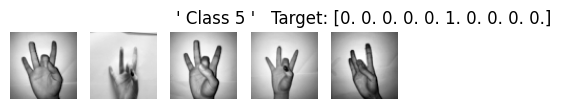

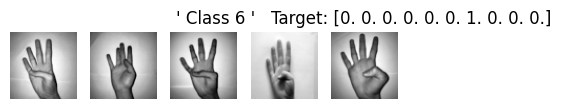

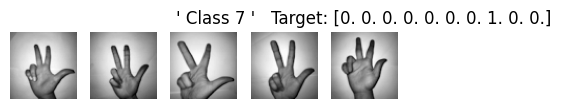

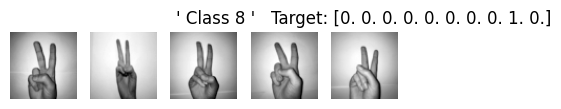

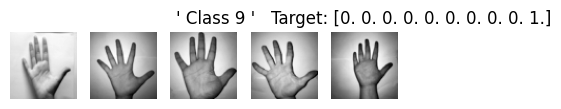

In [35]:
import matplotlib.pyplot as plt
for i in range(10):
    idx = np.argmax(y, axis=1) == i
    plt.figure(figsize=(5,1))
    for j, img in enumerate(X[idx][:5]):
        plt.subplot(1,5,j+1)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.axis('off')
    plt.title(f"' Class {i} '   Target: {y[idx][1]}")
    # plt.suptitle(f"Class {i}")
    plt.show()

In [36]:
# indices = np.argmax(y, axis=1)
# # نحول الاندكس إلى الكلاس الصحيح حسب العكس (يعني: 8 - index)
# labels = (y.shape[1] - indices)
# print(y[10])
# print(labels[10]) 

In [37]:
# y = np.flip(y, axis=1)
# y_labels = np.argmax(y, axis=1)

# print(y[5])
# print(y_labels[5])
# # الناتج: [1, 2, 0]

In [38]:
mapping = {
    0: 9,
    1: 0,
    2: 7,
    3: 6,
    4: 1,
    5: 8,
    6: 4,
    7: 3,
    8: 2,
    9: 5
}

def one_hot_to_label_mapped(one_hot_vector):
    index = np.argmax(one_hot_vector)   # نجيب مكان الـ 1
    return mapping.get(index, -1)      # نرجع اللابل الحقيقي أو -1 لو خطأ

# نحول كل الليبلات دفعة واحدة
labels = np.array([one_hot_to_label_mapped(vec) for vec in y])

print(labels) 

[9 3 3 ... 9 1 1]


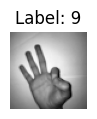

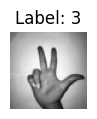

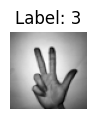

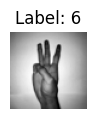

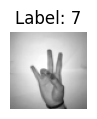

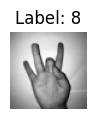

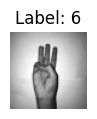

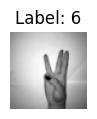

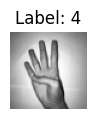

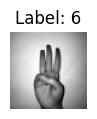

In [39]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.figure(figsize=(5,1))
    plt.imshow(X[i],cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
    plt.show()

In [40]:
print(X.shape)
print(np.min(X), np.max(X))
print(np.unique(labels))
print(labels[:10])

(2062, 64, 64, 1)
0.003921569 1.0
[0 1 2 3 4 5 6 7 8 9]
[9 3 3 6 7 8 6 6 4 6]


In [41]:
print(y[:10])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [42]:
print(np.sum(y, axis=0))


[204. 205. 206. 207. 206. 208. 207. 206. 206. 207.]


In [43]:
X_train, X_val, y_train, y_val = train_test_split(
    X, labels, test_size=0.2, random_state=42, stratify=y
)

In [44]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 = عدد الكلاسات
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # <-- مهم جدًا هنا
    metrics=['accuracy']
)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



c:\Users\Ajyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
print(y_train.shape)
print(y_train[0])


(1649,)
1


Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.1065 - loss: 2.2995 - val_accuracy: 0.4213 - val_loss: 1.9254
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.4090 - loss: 1.7184 - val_accuracy: 0.7942 - val_loss: 0.7918
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.6537 - loss: 0.9919 - val_accuracy: 0.8571 - val_loss: 0.4689
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7602 - loss: 0.7098 - val_accuracy: 0.8886 - val_loss: 0.3423
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8296 - loss: 0.5101 - val_accuracy: 0.9201 - val_loss: 0.2726
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8444 - loss: 0.4619 - val_accuracy: 0.8983 - val_loss: 0.2816
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8748 - loss: 0.3571 - val_accuracy: 0.9346 - val_loss: 0.2137
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8951 - loss: 0.3027 - val_accuracy: 0.9419 - v

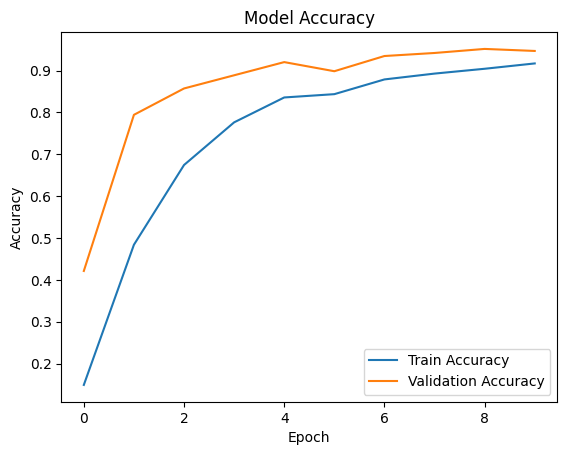

In [46]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)
# رسم دقة النموذج
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<Figure size 1500x500 with 0 Axes>

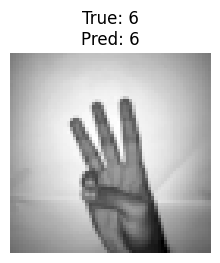

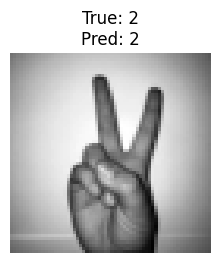

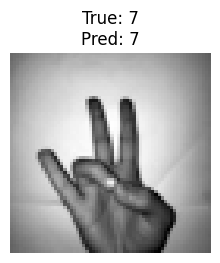

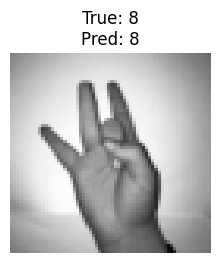

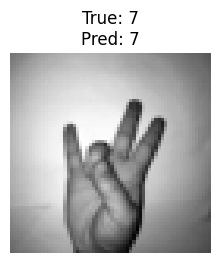

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import random

def show_random_predictions(X_test, y_test, predicted_classes, num_images=5):
    plt.figure(figsize=(15, 5))
    indices = random.sample(range(len(X_test)), num_images)  # اختيار عشوائي لـ num_images صور

    for i, idx in enumerate(indices):
        plt.figure(figsize=(15, 5))
        plt.subplot(1, num_images, i + 1)
        img = X_test[idx].reshape(64, 64)  # لو الصورة 64x64x1، نشيل البعد الأخير
        plt.imshow(img, cmap='gray')
        # نضيف +1 للـ y_test عشان نعرض الليبل الأصلي
        plt.title(f"True: {y_test[idx] }\nPred: {predicted_classes[idx] }")
        plt.axis('off')
        plt.show()
        

    # plt.show()

# مثال على استخدام الدالة:
predicted_classes = np.argmax(model.predict(X_val), axis=1)
show_random_predictions(X_val, y_val, predicted_classes, num_images=5)


In [48]:
model.save('model.h5')
